In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/churn_data.csv')

df.tail()

,Customer ID,Churn,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Location ID,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
7038,6840-RESVB,No,Male,38,No,No,Yes,Yes,2,NOTKAT3139,...,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3
7039,2234-XADUH,No,Female,30,No,No,Yes,Yes,2,IIQJBU2929,...,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4
7040,4801-JZAZL,No,Female,32,No,No,Yes,Yes,2,PBNAHR7564,...,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4
7041,8361-LTMKD,Yes,Male,75,No,Yes,Yes,No,0,GTKCBT2225,...,Month-to-Month,Yes,Mailed Check,74.40,306.60,0.00,20,42.44,369.04,2
7042,3186-AJIEK,No,Male,44,No,No,No,No,0,TJZLUX4957,...,Two Year,Yes,Bank Withdrawal,105.65,6844.50,0.00,0,2043.36,8887.86,4


In [3]:
for c in df.columns:
    print(c, df[c].dtype)

Customer ID object
Churn object
Gender object
Age int64
Under 30 object
Senior Citizen object
Married object
Dependents object
Number of Dependents int64
Location ID object
Country object
State object
City object
Zip Code int64
Lat Long object
Latitude float64
Longitude float64
Zip Code Population int64
Count int64
Quarter object
Referred a Friend object
Number of Referrals int64
Tenure in Months int64
Offer object
Phone Service object
Avg Monthly Long Distance Charges float64
Multiple Lines object
Internet Service object
Internet Type object
Avg Monthly GB Download int64
Online Security object
Online Backup object
Device Protection Plan object
Premium Tech Support object
Streaming TV object
Streaming Movies object
Streaming Music object
Unlimited Data object
Contract object
Paperless Billing object
Payment Method object
Monthly Charge float64
Total Charges float64
Total Refunds float64
Total Extra Data Charges int64
Total Long Distance Charges float64
Total Revenue float64
Satisfactio

## Label distribution

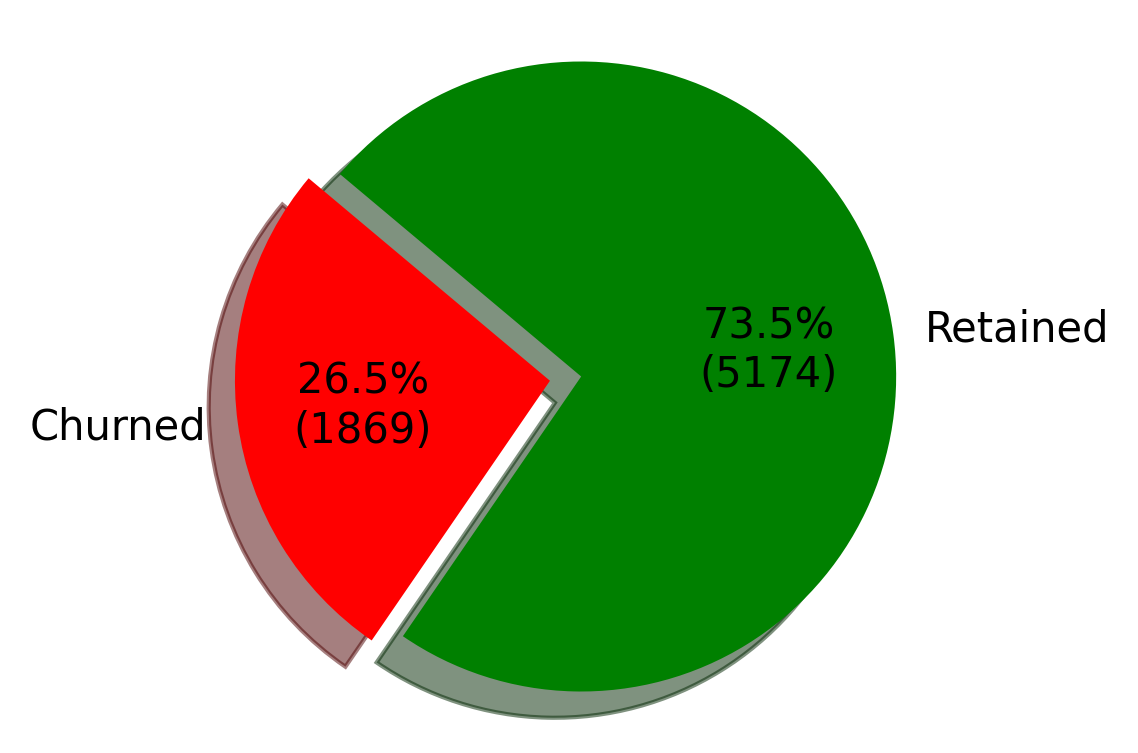

In [4]:
number_of_customers = len(df)
number_of_churned = len(df[df['Churn'] == 'Yes'])
number_of_retained = len(df[df['Churn'] == 'No'])

labels = ['Churned', 'Retained']
sizes = [number_of_churned, number_of_retained]
colors = ['red', 'green']
explode = (0.1, 0)

# Function to show absolute as well as relative values in figure
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        absolute = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, absolute)
    return my_format

# Plot pie chart
plt.figure(dpi=300, figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format(sizes), shadow=True, startangle=140)
plt.axis('equal')
plt.show()


## Correlation

#### Prepare data for correlation computation

In [5]:
for c in df.columns:
    print(c, df[c].nunique())

Customer ID 7043
Churn 2
Gender 2
Age 62
Under 30 2
Senior Citizen 2
Married 2
Dependents 2
Number of Dependents 10
Location ID 7043
Country 1
State 1
City 1106
Zip Code 1625
Lat Long 1679
Latitude 1626
Longitude 1625
Zip Code Population 1569
Count 1
Quarter 1
Referred a Friend 2
Number of Referrals 12
Tenure in Months 72
Offer 5
Phone Service 2
Avg Monthly Long Distance Charges 3584
Multiple Lines 2
Internet Service 2
Internet Type 3
Avg Monthly GB Download 50
Online Security 2
Online Backup 2
Device Protection Plan 2
Premium Tech Support 2
Streaming TV 2
Streaming Movies 2
Streaming Music 2
Unlimited Data 2
Contract 3
Paperless Billing 2
Payment Method 3
Monthly Charge 1585
Total Charges 6540
Total Refunds 500
Total Extra Data Charges 16
Total Long Distance Charges 6087
Total Revenue 6982
Satisfaction Score 5


In [6]:
coloumns_to_drop = [
    'Customer ID', # technical ID, not useful for analysis
    'Location ID', # technical ID, not useful for analysis
    'Lat Long', # Latitude and longitude are already present in separate columns
]

string_columns = df.select_dtypes(include='object').columns

In [7]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df_encoded = df.copy()

# Iterate through each column
for col in df.columns:

    # If the column has only one unique value, drop it because it cannot be used for prediction
    # If the column is in the list of columns to drop, drop it
    if df[col].nunique() == 1 or col in coloumns_to_drop:
        df_encoded = df_encoded.drop(columns=[col]) 
        print(f'Dropped {col}')
    
    # If the column is a string column, encode it
    elif col in string_columns:
        # If the column has only two unique values, use label encoding
        if df[col].nunique() == 2:
            df_encoded[col] = label_encoder.fit_transform(df[col])
            print(f'Label encoded {col}')
        # If the column has more than two unique values, use one-hot encoding
        else:
            df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=[col])
            print(f'One-hot encoded {col}')
    
    else:
        print(f'Not encoded {col}')

Dropped Customer ID
Label encoded Churn
Label encoded Gender
Not encoded Age
Label encoded Under 30
Label encoded Senior Citizen
Label encoded Married
Label encoded Dependents
Not encoded Number of Dependents
Dropped Location ID
Dropped Country
Dropped State
One-hot encoded City
Not encoded Zip Code
Dropped Lat Long
Not encoded Latitude
Not encoded Longitude
Not encoded Zip Code Population
Dropped Count
Dropped Quarter
Label encoded Referred a Friend
Not encoded Number of Referrals
Not encoded Tenure in Months
One-hot encoded Offer
Label encoded Phone Service
Not encoded Avg Monthly Long Distance Charges
Label encoded Multiple Lines
Label encoded Internet Service
One-hot encoded Internet Type
Not encoded Avg Monthly GB Download
Label encoded Online Security
Label encoded Online Backup
Label encoded Device Protection Plan
Label encoded Premium Tech Support
Label encoded Streaming TV
Label encoded Streaming Movies
Label encoded Streaming Music
Label encoded Unlimited Data
One-hot encoded

In [8]:
df_encoded

,Churn,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Latitude,...,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0,36,0,0,1,0,0,90001,33.973616,...,True,False,True,False,True,False,False,True,False,False
1,0,1,46,0,0,0,0,0,90002,33.949255,...,False,False,True,False,False,True,False,False,False,True
2,1,1,37,0,0,0,0,0,90003,33.964131,...,False,False,True,False,True,False,False,False,True,False
3,0,1,53,0,0,0,0,0,90004,34.076259,...,False,False,True,False,False,True,False,True,False,False
4,1,0,19,1,0,0,1,2,90005,34.059281,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,38,0,0,1,1,2,92301,34.667815,...,False,True,False,False,False,True,False,False,False,True
7039,0,0,30,0,0,1,1,2,92304,34.559882,...,False,False,False,True,False,True,False,False,True,False
7040,0,0,32,0,0,1,1,2,92305,34.167800,...,False,False,True,False,True,False,False,True,False,False
7041,1,1,75,0,1,1,0,0,92028,33.362575,...,False,False,False,True,True,False,False,False,False,True


#### Calculate correlations

In [9]:
correlations = df_encoded.corr()

In [10]:
# Get upper triangle of correlation marix
upper_triangle = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(bool))

# Convert to 1D series and drop NaN values
unique_correlations = upper_triangle.unstack().dropna()

# Sort by absolute value
unique_correlations = unique_correlations.abs().sort_values(ascending=False)
print(unique_correlations)

Total Revenue               Total Charges                        9.722121e-01
Referred a Friend           Married                              9.499865e-01
Latitude                    Zip Code                             8.947689e-01
Payment Method_Credit Card  Payment Method_Bank Withdrawal       8.935929e-01
Number of Dependents        Dependents                           8.882337e-01
                                                                     ...     
City_Meadow Vista           Avg Monthly Long Distance Charges    9.331014e-06
City_Crescent Mills         Avg Monthly Long Distance Charges    5.472946e-06
City_Diamond Bar            Total Long Distance Charges          2.038185e-06
City_Westlake Village       Monthly Charge                       1.499294e-06
City_Foresthill             Total Charges                        5.915891e-07
Length: 667590, dtype: float64


In [11]:
correlations['Churn'].abs().sort_values(ascending=False)

Churn                         1.000000
Satisfaction Score            0.754649
Contract_Month-to-Month       0.448427
Tenure in Months              0.352861
Contract_Two Year             0.328195
                                ...   
City_Sequoia National Park    0.000830
City_Wasco                    0.000830
City_Visalia                  0.000659
City_Los Angeles              0.000397
City_Ontario                  0.000136
Name: Churn, Length: 1156, dtype: float64

In [12]:
df_encoded.to_csv('data/churn_data_encoded.csv', index=False)

In [13]:
print(df_encoded.columns)

Index(['Churn', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Zip Code', 'Latitude',
       ...
       'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Contract_Month-to-Month',
       'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check'],
      dtype='object', length=1156)
